<a href="https://www.kaggle.com/code/feezakhankhanzada/trend-and-seasonality-of-individual-stocks?scriptVersionId=99832950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The notebook gives a rough idea about finding the trend and seasonality on individual stocks using TSA library. 

Note: I want to give more time to EDA of this dataset but my daily fulltime job and personal commitment would't allow me to focus more this kernel. Hence, the analysis are bit scattered and might be confusing. I will try to find some time and make a more comprehensive analysis later in the month (Hopefully!) :D

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

I am randomly selecting a stock with SecuritiesCode = 1301 to analyse it Trend, Seasonality and Residual Error.

First I will find the weekly correlation.

In [2]:
trainStockPrices = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')

trainStockPrices['Date'] = pd.to_datetime(trainStockPrices['Date'])

trainStockPrices['Close'] = trainStockPrices['Close'].fillna(1.0).astype(int)

trainStockPrices['DayOfWeek'] = trainStockPrices['Date'].dt.day_name()

trainStockPrices = trainStockPrices.loc[trainStockPrices.SecuritiesCode == 1301].set_index('Date')

trainStockPrices = trainStockPrices.fillna(1)

trainStockPrices = trainStockPrices.sort_index()

trainStockPrices = trainStockPrices[['Close' , 'DayOfWeek']]

import statsmodels.api as sm

decompose_result_mult = sm.tsa.seasonal_decompose(trainStockPrices['Close'], period=15, extrapolate_trend='freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.trend
decompose_result_mult.seasonal
decompose_result_mult.resid

result = pd.DataFrame([decompose_result_mult.trend , decompose_result_mult.seasonal , decompose_result_mult.resid , trainStockPrices.DayOfWeek])

result = result.T.reset_index()

import plotly.express as px

fig = px.line(result,
             y='trend', 
             title='Trend',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            hover_data={"DayOfWeek"},
            height=450)

fig.show()

fig = px.line(result,
             y='seasonal', 
             title='Seasonal',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hover_data={"DayOfWeek"},

            height=450)

fig.show()

fig = px.line(result,
             y='resid', 
             title='Resid',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

In [3]:
result.seasonal.nunique()

15

Then monthly correlation

In [4]:
import statsmodels.api as sm

decompose_result_mult = sm.tsa.seasonal_decompose(trainStockPrices['Close'], period=30, extrapolate_trend='freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.trend
decompose_result_mult.seasonal
decompose_result_mult.resid

result = pd.DataFrame([decompose_result_mult.trend , decompose_result_mult.seasonal , decompose_result_mult.resid , trainStockPrices.DayOfWeek])

result = result.T.reset_index()

fig = px.line(result,
             y='trend', 
             title='Trend',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

fig = px.line(result,
             y='seasonal', 
             title='Seasonal',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
              hover_data={"DayOfWeek"},
            height=450)

fig.show()

fig = px.line(result,
             y='resid', 
             title='Resid',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

finally yearly correlation

In [5]:
import statsmodels.api as sm

decompose_result_mult = sm.tsa.seasonal_decompose(trainStockPrices['Close'], period=365, extrapolate_trend='freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.trend
decompose_result_mult.seasonal
decompose_result_mult.resid

result = pd.DataFrame([decompose_result_mult.trend , decompose_result_mult.seasonal , decompose_result_mult.resid])

result = result.T.reset_index()

fig = px.line(result,
             y='trend', 
             title='Trend',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

fig = px.line(result,
             y='seasonal', 
             title='Seasonal',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

fig = px.line(result,
             y='resid', 
             title='Resid',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

From the above graph it is clearly shown that the data is seasonal with occasional noises, and big turmoil which needs to get investigated.

Here is a technique of removing trend from the data 

In [6]:
sdate = trainStockPrices.index.min()
edate = trainStockPrices.index.max()

print(sdate , edate)
trainStockPrices[sdate:]

2017-01-04 00:00:00 2021-12-03 00:00:00


,Close,DayOfWeek
Date,,
2017-01-04,2742,Wednesday
2017-01-05,2738,Thursday
2017-01-06,2740,Friday
2017-01-10,2748,Tuesday
2017-01-11,2745,Wednesday
...,...,...
2021-11-29,2951,Monday
2021-11-30,2900,Tuesday
2021-12-01,2911,Wednesday


In [7]:
#remove trend 
trainStockPrices["diff"] = trainStockPrices['Close'].diff()

In [8]:
trainStockPrices = trainStockPrices.reset_index()

In [9]:
import matplotlib as plt

fig = px.line(trainStockPrices,
             y=['Close' , 'diff'], 
             title='With and Without Trend',
             x='Date',
             color_discrete_sequence=px.colors.sequential.RdBu,
            height=450)

fig.show()

Following the Autocorrelation Graph to analyze the seasonality

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



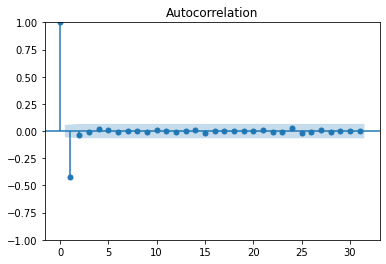

In [10]:
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
trainStockPrices["diff"].iloc[0] = 0
plot_acf(trainStockPrices["diff"])
plt.show()

Performing some statistical forecasting

1. Naive Forecasting

In [11]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

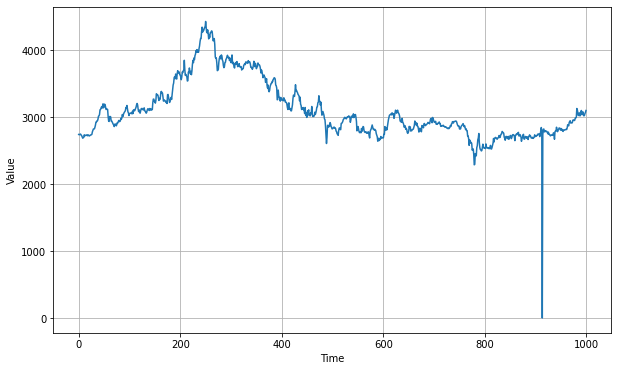

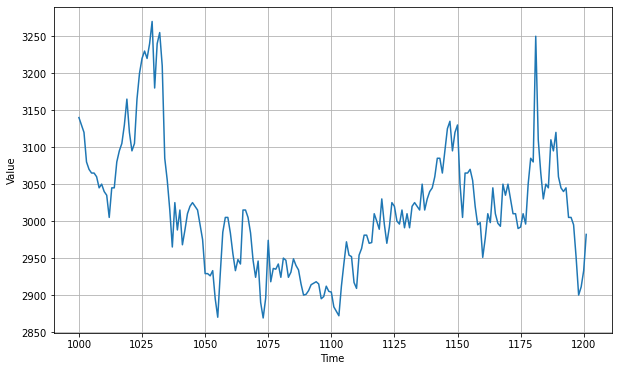

In [12]:
split_time = 1000

time_train = trainStockPrices.iloc[0:split_time].index.to_numpy()
x_train = trainStockPrices.iloc[0:split_time].Close.to_numpy()

time_valid = trainStockPrices.iloc[split_time:].index.to_numpy()
x_valid = trainStockPrices.iloc[split_time:].Close.to_numpy()

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

In [13]:
naive_forecast = trainStockPrices.iloc[split_time - 1:-1].Close.to_numpy()

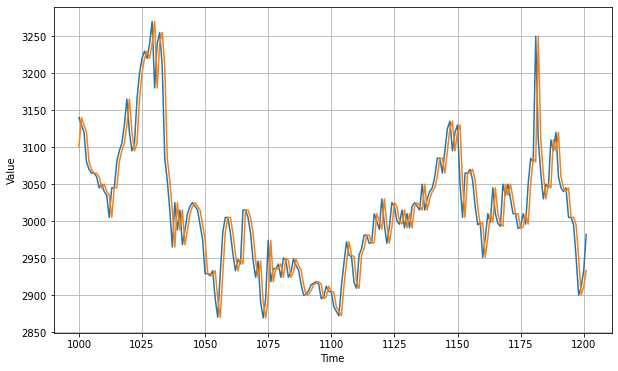

In [14]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

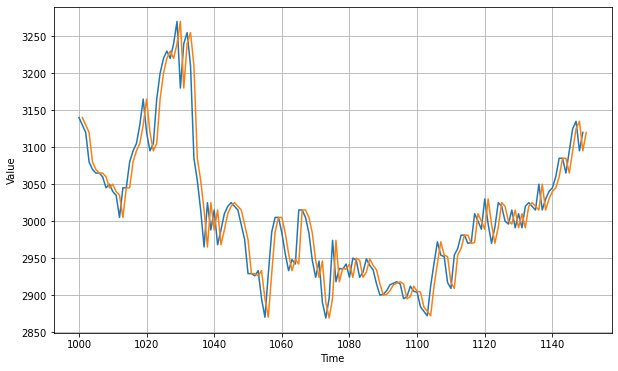

In [15]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [16]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

1140
24


2022-07-02 08:36:04.706380: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


2. Moving Average

In [17]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

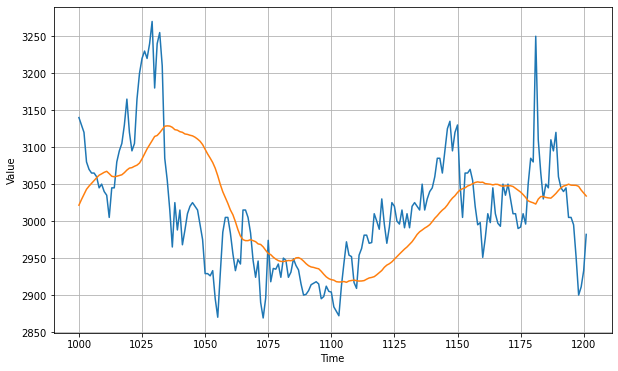

In [18]:
moving_avg = moving_average_forecast(trainStockPrices.Close.to_numpy(), 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [19]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

5100.248976897693
56.41023102310232


3. Differencing

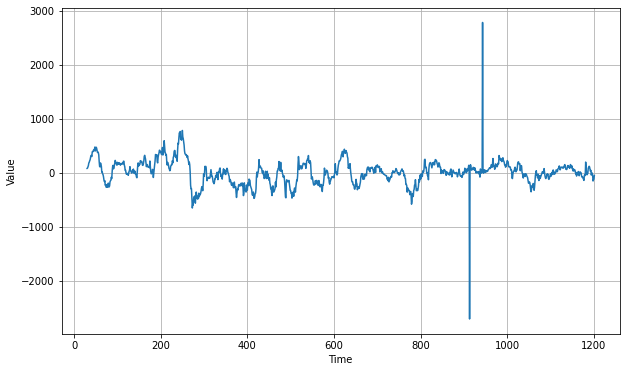

In [20]:
diff_series = (trainStockPrices.Close.to_numpy()[30:] - trainStockPrices.Close.to_numpy()[:-30])
diff_time = trainStockPrices.index.to_numpy()[30:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

4. Difference Moving Average

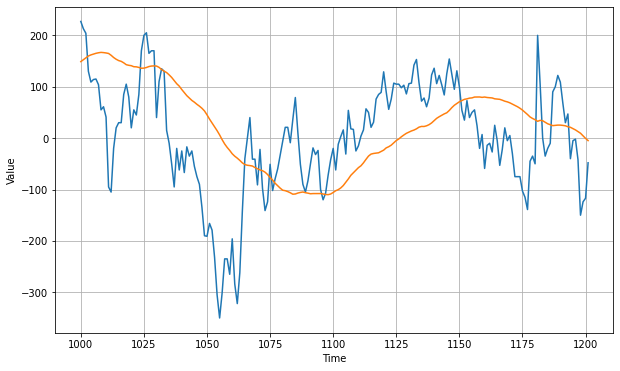

In [21]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 30 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 30:])
plot_series(time_valid, diff_moving_avg)
plt.show()


5. Difference Moving Average plus Past

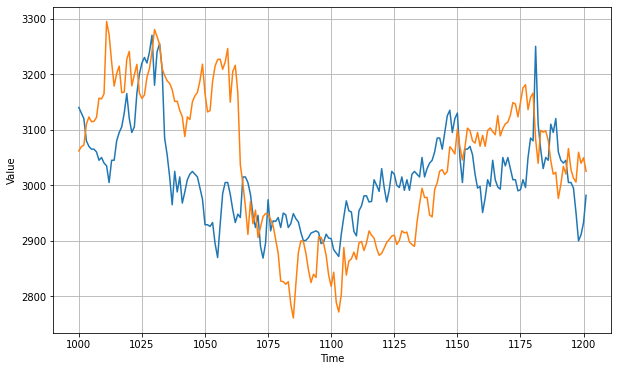

In [22]:
diff_moving_avg_plus_past = trainStockPrices.Close.to_numpy()[split_time - 30:-30] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [23]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

12936.108194059407
93.38752475247526


6. Difference Moving Average plus Smooth Past

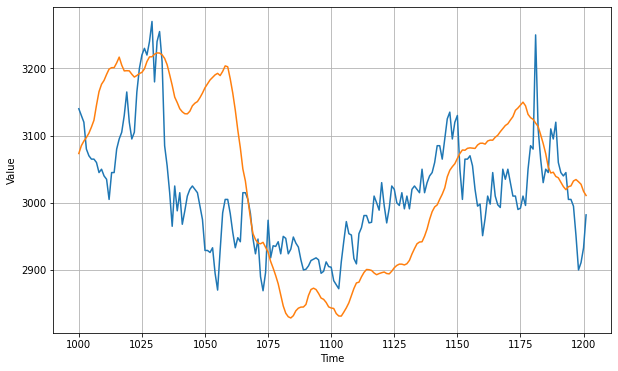

In [24]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(trainStockPrices.Close.to_numpy()[split_time - 35:-25], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [25]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

11218.739401980201
87.62653465346537


In [26]:
print(tf.__version__)

2.6.2


In [27]:
dataset = trainStockPrices['Close'].rolling(window=5)#.to_numpy().window(5, shift=1)#

for window_dataset in dataset:
  for val in window_dataset:
    print(val, end=" ")
  print()

2742 
2742 2738 
2742 2738 2740 
2742 2738 2740 2748 
2742 2738 2740 2748 2745 
2738 2740 2748 2745 2731 
2740 2748 2745 2731 2722 
2748 2745 2731 2722 2704 
2745 2731 2722 2704 2686 
2731 2722 2704 2686 2694 
2722 2704 2686 2694 2699 
2704 2686 2694 2699 2737 
2686 2694 2699 2737 2720 
2694 2699 2737 2720 2727 
2699 2737 2720 2727 2731 
2737 2720 2727 2731 2733 
2720 2727 2731 2733 2727 
2727 2731 2733 2727 2734 
2731 2733 2727 2734 2722 
2733 2727 2734 2722 2735 
2727 2734 2722 2735 2729 
2734 2722 2735 2729 2720 
2722 2735 2729 2720 2725 
2735 2729 2720 2725 2731 
2729 2720 2725 2731 2737 
2720 2725 2731 2737 2737 
2725 2731 2737 2737 2745 
2731 2737 2737 2745 2782 
2737 2737 2745 2782 2801 
2737 2745 2782 2801 2824 
2745 2782 2801 2824 2825 
2782 2801 2824 2825 2826 
2801 2824 2825 2826 2851 
2824 2825 2826 2851 2882 
2825 2826 2851 2882 2927 
2826 2851 2882 2927 2928 
2851 2882 2927 2928 2945 
2882 2927 2928 2945 2946 
2927 2928 2945 2946 2971 
2928 2945 2946 2971 3015 
2945 2946 